<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-some-Packages" data-toc-modified-id="import-some-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import some Packages</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Summery-of-dataset" data-toc-modified-id="Summery-of-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summery of dataset</a></span></li><li><span><a href="#Cointegration-Function" data-toc-modified-id="Cointegration-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cointegration Function</a></span><ul class="toc-item"><li><span><a href="#Find-Cointegrated-pairs" data-toc-modified-id="Find-Cointegrated-pairs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Find Cointegrated pairs</a></span></li><li><span><a href="#Heatmap-plot" data-toc-modified-id="Heatmap-plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap plot</a></span></li></ul></li><li><span><a href="#Trading-based-on-Pairs-symbols" data-toc-modified-id="Trading-based-on-Pairs-symbols-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Trading based on Pairs symbols</a></span><ul class="toc-item"><li><span><a href="#Constructing-Symbol2-Prices" data-toc-modified-id="Constructing-Symbol2-Prices-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Constructing <code>Symbol2</code> Prices</a></span></li><li><span><a href="#Checking-Cointegration-between-two-symbols" data-toc-modified-id="Checking-Cointegration-between-two-symbols-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking Cointegration between two symbols</a></span></li></ul></li><li><span><a href="#Zscore-Function" data-toc-modified-id="Zscore-Function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><code>Zscore</code> Function</a></span></li><li><span><a href="#Orders-for-each-symbol" data-toc-modified-id="Orders-for-each-symbol-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Orders for each symbol</a></span></li></ul></div>

# import some Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import coint
import seaborn
from pandas_datareader import data

Furthermore information about `coint` function available on:
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html

# Load Data
load the financial data by using the `pandas_datareader`

In [2]:
symbolsIds = ['SPY','AAPL','ADBE','LUV','MSFT','SKYW','QCOM','HPQ','JNPR','AMD','IBM']

def load_financial_data(symbols, start_date,end_date,output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading symbols data')
        
    except FileNotFoundError:
        print('File not found...downloading the symbols data')  
        df = data.DataReader(symbols, 'yahoo', start_date,end_date)
        df.to_pickle(output_file)
        print("Downloaded successfully")
        
    return df

data=load_financial_data(symbolsIds,start_date='2001-01-01',end_date = '2018-01-01',output_file='multi_data_large.pkl')

File data found...reading symbols data


# Summery of dataset

In [3]:
data.head()

Attributes Adj Close                                                        \
Symbols         AAPL       ADBE      AMD        HPQ        IBM        JNPR   
Date                                                                         
2001-01-02  0.228800  23.221340  14.3750   9.306046  53.541969   87.910484   
2001-01-03  0.251872  28.787939  16.2500  10.478911  59.736542  113.142586   
2001-01-04  0.262447  26.707260  16.6875  10.651964  58.829098  107.410423   
2001-01-05  0.251872  25.589281  16.0000   9.421409  59.342022   94.124756   
2001-01-08  0.254756  24.626575  16.1875   9.652135  59.065826   98.986336   

Attributes                                              ...      Volume  \
Symbols           LUV       MSFT       QCOM       SKYW  ...        ADBE   
Date                                                    ...               
2001-01-02  20.411097  13.774833  24.332151  23.294533  ...  16813400.0   
2001-01-03  20.045078  15.223770  28.859581  24.406309  ...  15257000.0   
2001-01-04  21.198009  15.382554  27.100096  23.241587  ...   9609600.0   
2001-01-05  21.289507  15.600889  25.083151  23.506292  ...   8422200.0   
2001-01-08  20.740505  15.541340  26.735340  22.765108  ...   8495600.0   

Attributes                                                            \
Symbols           AMD         HPQ         IBM        JNPR        LUV   
Date                                                                   
2001-01-02  4863600.0  15019842.0   8007200.0  22142800.0  3792150.0   
2001-01-03  8808100.0  31391932.0  12769900.0  36720500.0  6715200.0   
2001-01-04  7045000.0  21579160.0  15420500.0  16270000.0  6138150.0   
2001-01-05  5230600.0  21077764.0   8043200.0  16469100.0  6526500.0   
2001-01-08  3365700.0  14371133.0   6064800.0  20383600.0  3504150.0   

Attributes                                                 
Symbols            MSFT        QCOM      SKYW         SPY  
Date                                                       
2001-01-02   82413200.0  36380600.0  354600.0   8737500.0  
2001-01-03  135962200.0  47526000.0  452400.0  19431600.0  
2001-01-04  112397000.0  40355600.0  950000.0   9219000.0  
2001-01-05   93414600.0  31656400.0  157700.0  12911400.0  
2001-01-08   79817600.0  23359400.0  426500.0   6625300.0  

[5 rows x 66 columns]

# Cointegration Function

Creating a function establishing **cointegration** between pairs, as  
shown in the following code. This function takes as inputs a list of financial  
instruments and calculates the cointegration values of these symbols.  

In [4]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

## Find Cointegrated pairs

In [5]:
pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])

## Heatmap plot
We will use the `seaborn` package to draw the heatmap.  
Heatmap will use the `list` of symbols on the x and y axes.  
The last argument will mask the p-values higher than 0.98  

This map shows the **pvalues** of the return of the coin:
- If a p-value is lower than 0.02, this means the null hypothesis is rejected.
- This means that the two series of prices corresponding to two different symbols can be co-integrated.
- This means that the two symbols will keep the same spread on average. On the heatmap, we observe that the following symbols have p-values lower than 0.02:

<AxesSubplot:>

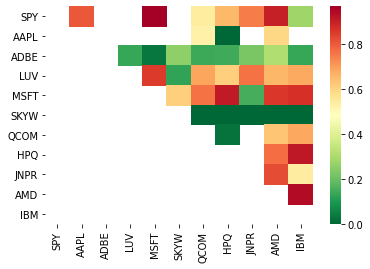

In [6]:
seaborn.heatmap(pvalues, xticklabels=symbolsIds,yticklabels=symbolsIds, cmap='RdYlGn_r',mask = (pvalues >= 0.98))

this plot represents the heatmap measuring the **cointegration** between a
pair of symbols.
- **If it is red**, this means that the p-value is 1, **which means** that the null hypothesis is not rejected.  
Therefore, there is no significant evidence that the pair of symbols is co-integrated.  

After selecting the pairs we will use for trading, let's focus on how to trade these pairs of symbols.

# Trading based on Pairs symbols
let's create a symbol return that we will call `Symbol1`.  
The value of the `Symbol1` price starts from a value of 10 and, every day, it will vary  
based on a random return *(following a normal distribution)*. We will draw the  
price values by using the function plot of the `matplotlib.pyplot` package:  

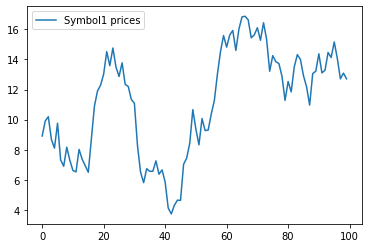

In [7]:
# Set a seed value to make the experience reproducible
np.random.seed(123)

# Generate Symbol1 daily returns
Symbol1_returns = np.random.normal(0, 1, 100)

# Create a series for Symbol1 prices
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns),name='Symbol1') + 10

plt.plot(Symbol1_prices , label = 'Symbol1 prices')
plt.legend()
plt.show()

for better understanding What's going on in `Symbol1_prices` look at DataFrame constructed right down below:

In [11]:
pd.DataFrame(data=[Symbol1_prices , Symbol1_returns])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Symbol1,8.914369,9.911715,10.194693,8.688399,8.109798,9.761235,7.334556,6.905643,8.171579,7.304839,...,14.371074,13.103722,13.284757,14.462619,14.127608,15.158723,14.074155,12.710683,13.090084,12.710907
Unnamed 0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740,...,1.150206,-1.267352,0.181035,1.177862,-0.335011,1.031114,-1.084568,-1.363472,0.379401,-0.379176


## Constructing `Symbol2` Prices
We build the `Symbol2` prices based on the behavior of the `Symbol1` prices, as shown in the code.  
In addition to copying the behavior of `Symbol1`, we will add noises.  
The noise is a random value following a **normal distribution**.  
The introduction of this noise is designed to mimic market fluctuations.  
It changes the spread value between the two symbol prices:

This code will return the following output.
The plot shows the evolution of the price of Symbol 1 and Symbol 2:


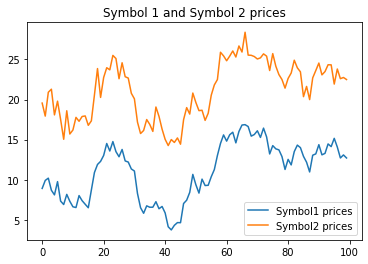

In [12]:
# Create a series for Symbol2 prices
# We will copy the Symbol1 behavior
print("This code will return the following output.\nThe plot shows the evolution of the price of Symbol 1 and Symbol 2:")
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol2_prices.name = 'Symbol2'
plt.title("Symbol 1 and Symbol 2 prices")
plt.plot(Symbol1_prices , label = 'Symbol1 prices')
plt.plot(Symbol2_prices , label = 'Symbol2 prices')
plt.legend()
plt.show()

## Checking Cointegration between two symbols
now we will check the cointegration between the two symbols by using  
the `coint` function. This takes two lists/series of values and performs a test to  
check whether the two series are co-integrated:

In [13]:
score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
pvalue <= 0.02

True

In the code, pvalue is less than 0.02.  
which means that we can reject the null hypothesis. Therefore, these two symbols are co-integrated.

# `Zscore` Function
We will define the `zscore` function. This function returns how far a piece of data  
is from the population mean. This will help us to choose the direction of trading.  
- **If** the return value of this function is **positive**, this means that the symbol price is  
higher than the average price value. Therefore, its price is expected to go down  
or the paired symbol value will go up.    

In this case, we will want to short this symbol and long the other one.  
The code implements the `zscore` function:

In [14]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

We will use the ratio between the two symbol prices. We will need to set the  
threshold that defines when a given price is far off the mean price value. For that,  
we will need to use specific values for a given symbol. If we have many symbols  
we want to trade with, this will imply that this analysis be performed for all the  
symbols. Since we want to avoid this tedious work, we are going to normalize  
this study by analyzing the ratio of the two prices instead. As a result, we  
calculate the ratios of the Symbol 1 price against the Symbol 2 price.  
Let's have a look at the code:


we show the variation in the ratio between symbol 1 and symbol 2 prices:


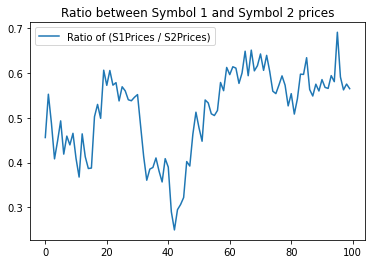

In [15]:
print("\nwe show the variation in the ratio between symbol 1 and symbol 2 prices:")
ratios = Symbol1_prices / Symbol2_prices
plt.figure()
plt.title("Ratio between Symbol 1 and Symbol 2 prices")
plt.plot(ratios , label = 'Ratio of (S1Prices / S2Prices)')
plt.legend()
plt.show()

Let's draw the chart showing when we will place orders with the following code.
____
This code will return the following output.

The **curve** demonstrates the following:
The **Z-score** evolution with horizontal lines at -1 (gray), +1 (red), and the
average of Z-score (black).The average of Z-score is 0.  

When the Z-score reaches -1 or +1, we will use this event as a trading signal.
The values +1 and -1 are **arbitrary** values.
It should be set depending on the study we will run in order to create this
trading strategy:

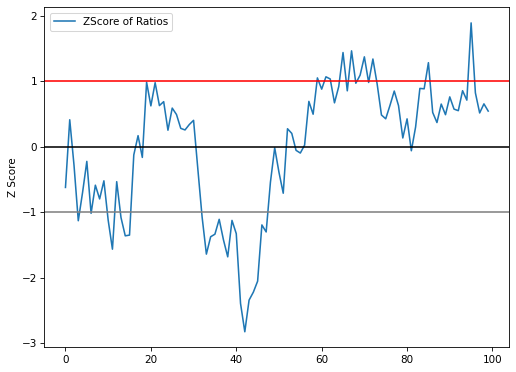

In [16]:
figure(figsize=(8, 6), dpi=75)
plt.plot(zscore(ratios) , label = 'ZScore of Ratios')
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="gray")
plt.legend()
plt.ylabel('Z Score')
plt.show()

Every time the Z-score reaches one of the thresholds, we have a trading signal.  
As shown in the code, we will present a graph, each time we go long for Symbol
1 with a **green** marker, and each time we go short with a **red** marker:

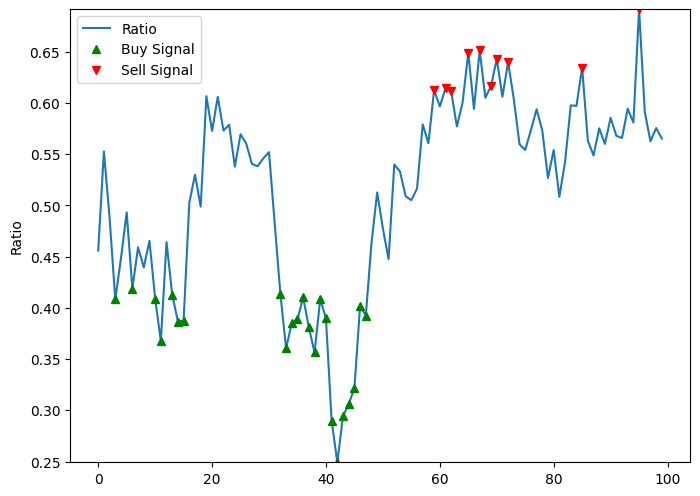

In [17]:
figure(figsize=(8, 6), dpi=100)
plt.plot(ratios)
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
plt.plot(buy, color="g", linestyle="None", marker="^")
plt.plot(sell, color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.ylabel('Ratio')
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

# Orders for each symbol
____
we will write the following code, which represents the buy and sell order
for **each symbol** :

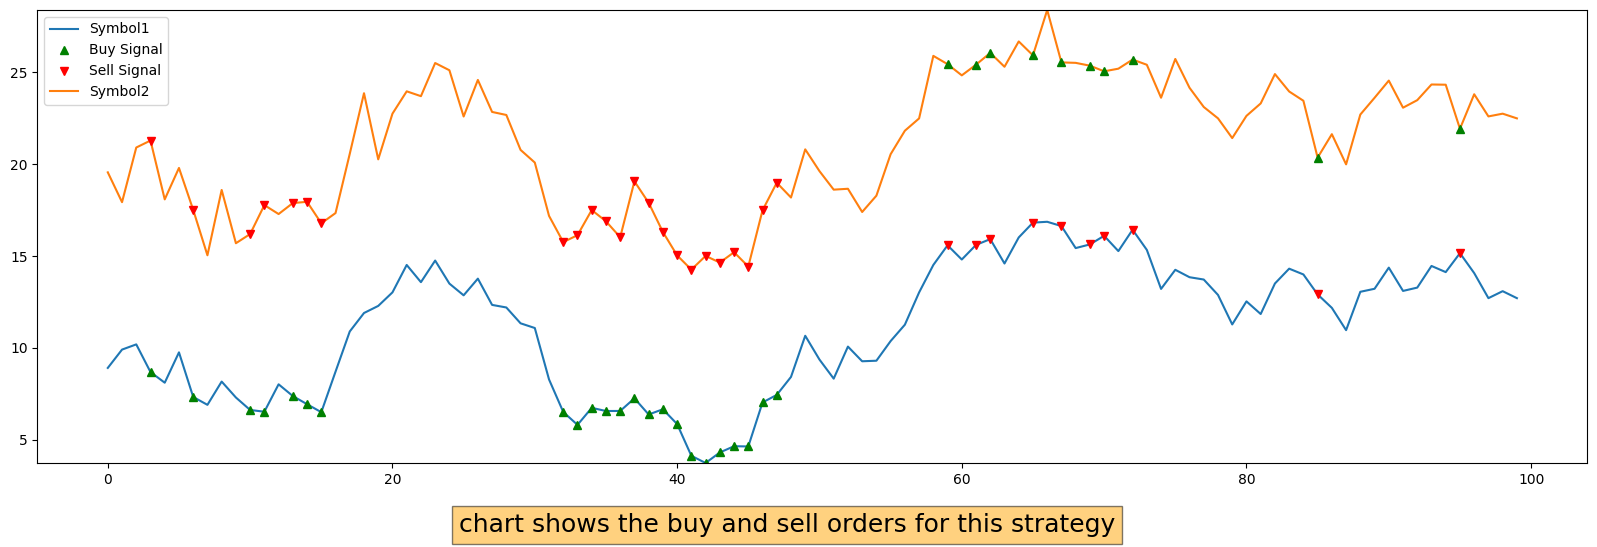

In [19]:
figure(figsize=(20, 6), dpi=100)
plt.plot(Symbol1_prices, label = 'Symbol1 prices')
symbol1_buy = Symbol1_prices.copy()
symbol1_sell = Symbol1_prices.copy()
symbol2_buy = Symbol2_prices.copy()
symbol2_sell = Symbol2_prices.copy()

symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
plt.plot(symbol1_buy , color="g", linestyle="None", marker="^")
plt.plot(symbol1_sell , color="r", linestyle="None", marker="v")


plt.plot(Symbol2_prices , label = 'Symbol2 prices')
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
plt.plot(symbol2_buy ,color="g", linestyle="None", marker="^")
plt.plot(symbol2_sell ,color="r", linestyle="None", marker="v")


x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.figtext(0.5, 0.01, "chart shows the buy and sell orders for this strategy", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()